In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
Skeleton
- Learning Curve
- Hyperparameter Tuning + Validation Curve + Wall Clock

# Titanic

## Get train and test

In [17]:
from functions import preprocess_titanic, SEED, generate_learning_curve, generate_validation_curve

In [5]:
from sklearn.metrics import roc_auc_score

In [6]:
X_train, X_test, y_train, y_test = preprocess_titanic()

## Baseline Learning Curve

In [7]:
estimator = KNeighborsClassifier()

train roc auc:  0.8786577886805678
test roc auc: 0.7101449275362319


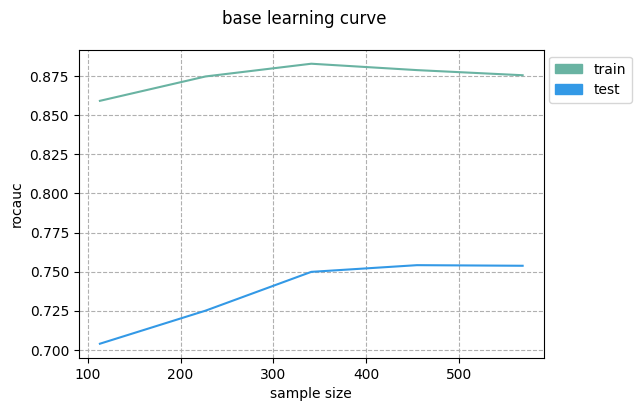

In [8]:
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "base learning curve", "roc_auc")

## Validation Curve

### algorithm

In [9]:
params = ["ball_tree", "kd_tree", "brute"]
estimators = []
for param in params:
    estimator = KNeighborsClassifier(algorithm=param)
    estimators.append(estimator)

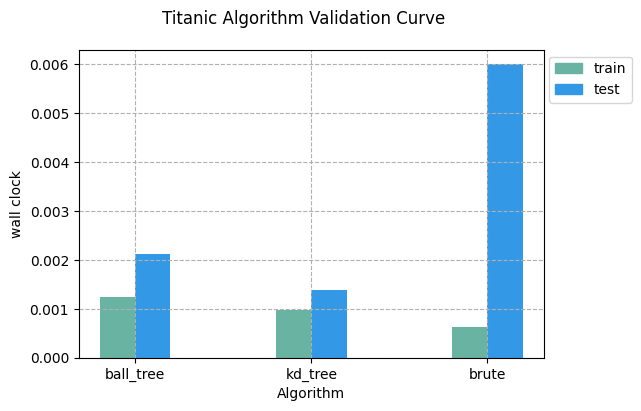

In [10]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Algorithm", "Titanic Algorithm Validation Curve",'bar',"roc_auc")

### # of K

In [11]:
params = [1,2,3,4,5,6,7,8,9,10,15,20]
estimators = []
for param in params:
    estimator = KNeighborsClassifier(algorithm="kd_tree", n_neighbors=param)
    estimators.append(estimator)

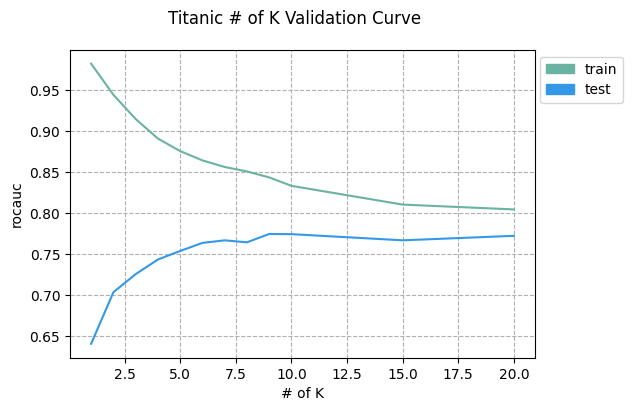

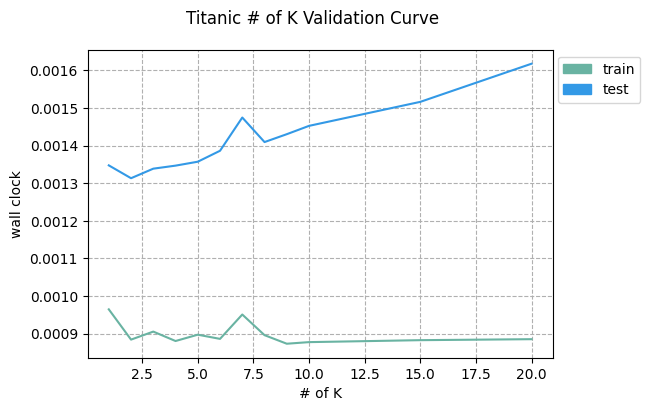

In [13]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "# of K", "Titanic # of K Validation Curve",'line',"roc_auc")

### Weight

In [14]:
params = ["uniform", "distance"]
estimators = []
for param in params:
    estimator = KNeighborsClassifier(algorithm="kd_tree", n_neighbors=9, weights=param)
    estimators.append(estimator)

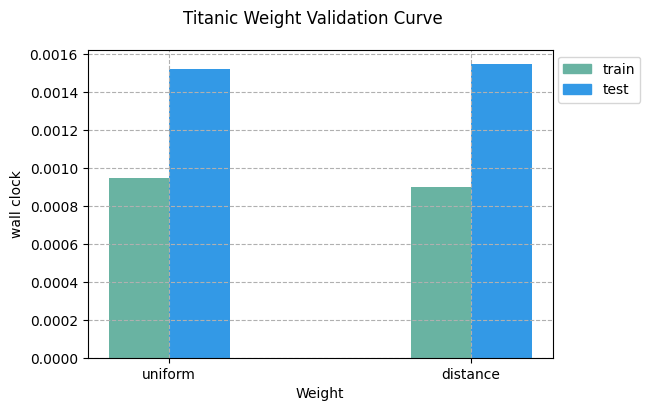

In [15]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Weight", "Titanic Weight Validation Curve",'bar',"roc_auc")

In [26]:
from functions import trigger_validate

### Validation - KNN Optimal Hyperparam

train wall clock: 0.0010986804962158203
test wall clock: 0.0016911029815673828
train roc auc:  0.9993032783465585
test roc auc: 0.7536231884057971


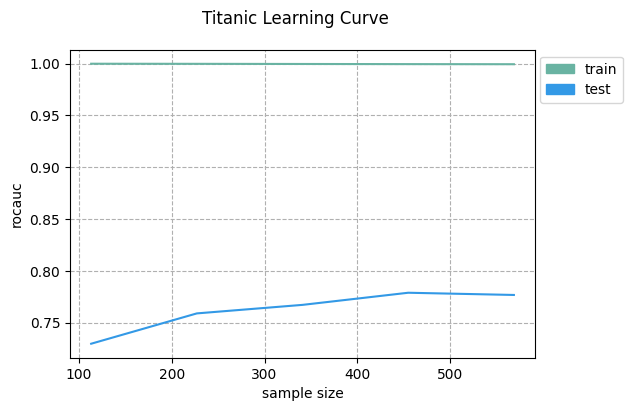

In [18]:
estimator = KNeighborsClassifier(algorithm="kd_tree", n_neighbors=9, weights="distance")
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "Titanic Learning Curve", "roc_auc")